# Cancelled Agreement Analysis

In [1]:
import pandas as pd
import os
import numpy as np

os.chdir(r'C:\Users\jean-claude.disch\Jupyter Notebook Projects\OpsagteVirksomhederAnalyse')

y2021 = pd.read_excel('Opsagte aftaler 2021.xlsx', header = 1)
y2022 = pd.read_excel('Opsagte aftaler 2022.xlsx', header= 1)
y2023 = pd.read_excel('Opsagte aftaler 2023.xlsx', header = 1)

# Convert the CVR number columns to string in all dataframes after dropping NA values
y2021 = y2021.dropna(subset=['CVR'])
y2021['CVR'] = y2021['CVR'].astype(int).astype(str)
y2021 = y2021[y2021['CVR'].str.len() == 8]

y2022 = y2022.dropna(subset=['CVR'])
y2022['CVR'] = y2022['CVR'].astype(int).astype(str)
y2022 = y2022[y2022['CVR'].str.len() == 8]

y2023 = y2023.dropna(subset=['CVR'])
y2023['CVR'] = y2023['CVR'].astype(int).astype(str)
y2023 = y2023[y2023['CVR'].str.len() == 8]



# Filter the dataframes based on the 'Kategori' column
y2021 = y2021[y2021['Kategori'] == 'Churn - hel aftale']
y2022 = y2022[y2022['Kategori'] == 'Churn - hel aftale']
y2023 = y2023[y2023['Kategori'] == 'Churn - hel aftale']

# Add a 'Year' column to the dataframes
y2021['Year'] = 2021
y2022['Year'] = 2022
y2023['Year'] = 2023

# Concatenate the dataframes vertically
all_years = pd.concat([y2021[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:']], 
                       y2022[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:']], 
                       y2023[['CVR', 'Year', 'Beløb 12 mdr. (TCV)', 'Løsning', 'Opsagt dato:']]])

# Save the merged dataframe to an Excel file
all_years.to_excel('AllYearsMerged.xlsx', index=False)


In [2]:
all_years


,CVR,Year,Beløb 12 mdr. (TCV),Løsning,Opsagt dato:
2,28870515,2021,78556.4,Visma Expense,2021-01-04 00:00:00
6,43387014,2021,77346.97,Visma Løn og HR,2021-01-12 00:00:00
7,31061350,2021,52126.72,BPO Visma Løn og HR,2021-01-13 00:00:00
9,61052615,2021,13053.78,Visma Løn og HR,2021-01-28 00:00:00
10,26042925,2021,28895.99,Visma Løn og HR,2021-01-06 00:00:00
...,...,...,...,...,...
63,34725101,2023,30453.0,Visma Løn,2023-05-24 00:00:00
64,24246361,2023,104340.0,Visma Løn og Leder/medarbejdermodul,2023-05-24 00:00:00
66,20309687,2023,76044.0,Visma Løn,2023-05-26 00:00:00
67,34082200,2023,57600.0,Visma Løn (Fehmarn Belt Contractors I/S),2023-05-26 00:00:00


In [3]:
# Define bins
bins = [0, 20000, 40000, 60000, 80000,  100000, 120000, 140000, 160000, 180000, 200000]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', 
          '100000-120000', '120000-140000', '140000-160000', '160000-180000', '180000-200000']


# Create a new column 'TCV_range' in fakturering dataframe based on 'Beløb 12 mdr. (TCV)' column
all_years['TCV_range'] = pd.cut(all_years['Beløb 12 mdr. (TCV)'], bins=bins, labels=labels)

# Count the number of companies in each TCV_range
tcv_count = all_years.groupby('TCV_range').size()

print(tcv_count)
# indsæt virksomhedsnavn i stedet

TCV_range
0-20000          38
20000-40000      39
40000-60000      35
60000-80000      22
80000-100000     11
100000-120000    10
120000-140000     7
140000-160000    14
160000-180000     5
180000-200000     4
dtype: int64


In [4]:
for tcv_range in labels:
    # Filter dataframe for the current TCV range
    df = all_years[all_years['TCV_range'] == tcv_range]

    # Save the dataframe to an Excel file
    df.to_excel(f'{tcv_range}.xlsx', index=False)

In [5]:
def count_products(solution):
    if pd.isnull(solution):
        return 0
    else:
        return solution.lower().count('og') + 1

all_years['Num_Solutions'] = all_years['Løsning'].apply(count_products)

# Create bins
bins = [0, 20000, 40000, 60000, 80000, 100000, 120000, 140000, 160000, 180000, 200000]
labels = ['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000', '100000-120000', '120000-140000', '140000-160000', '160000-180000', '180000-200000']
all_years['Range'] = pd.cut(all_years['Beløb 12 mdr. (TCV)'], bins=bins, labels=labels)

# Calculate the average number of solutions for each interval
avg_solutions = all_years.groupby('Range')['Num_Solutions'].mean()
print(avg_solutions)


Range
0-20000          1.210526
20000-40000      1.179487
40000-60000      1.257143
60000-80000      1.318182
80000-100000     1.636364
100000-120000    1.400000
120000-140000    1.428571
140000-160000    1.642857
160000-180000    1.200000
180000-200000    2.000000
Name: Num_Solutions, dtype: float64


In [6]:
# Count the number of companies with each number of products
product_counts = all_years['Num_Solutions'].value_counts()

print(product_counts)

# Create an Excel writer object
writer = pd.ExcelWriter('ProductsCount.xlsx')

# For each unique number of products, filter the dataframe and write to a separate sheet
for num_products in all_years['Num_Solutions'].unique():
    temp_df = all_years[all_years['Num_Solutions'] == num_products]
    temp_df.to_excel(writer, sheet_name=f'{num_products}_products', index=False)

# Save the excel file
writer.save()


1    137
2     71
Name: Num_Solutions, dtype: int64


In this code, value_counts is used to count the number of companies with each number of products. Then, an ExcelWriter object is created. The DataFrame is filtered for each unique number of products and written to a separate sheet in the Excel file. The name of each sheet corresponds to the number of products. Finally, the Excel file is saved. The resulting file, 'ProductsCount.xlsx', will contain one sheet for each unique number of products, with each sheet containing the companies that have that number of products.

# Product Analysis

## Which products have the highest and lowest churn?

In [7]:
# Convert all product names to lowercase and split into individual words
all_years['Løsning'] = all_years['Løsning'].astype(str).str.replace('[^\w\s]', '').str.lower().str.split()

# Explode the list of words into multiple rows
words_df = all_years.explode('Løsning')

# Get word count excluding the following words:
exclude_words = ['og', 'til', 'is', 'no', 'skl', 'belt', 'lønhr', 'ledermedarbejdermodul', 'visma', 'fehmarn', 'contractors']  # Words to exclude from the result
word_counts = words_df[~words_df['Løsning'].isin(exclude_words)]['Løsning'].value_counts()

# Convert the word counts to dataframes
word_counts = word_counts.reset_index().rename(columns={'index': 'Word', 'Løsning': 'Count'})

# Print the resulting dataframe
print(word_counts)


         Word  Count
0         løn    176
1          hr     83
2         bpo     54
3   easycruit     15
4  læseadgang      9
5        time      8
6     expense      4
7        addo      3
8     lønview      2
9      finans      1


C:\Users\jean-claude.disch\AppData\Local\Temp\ipykernel_35164\2852647559.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  all_years['Løsning'] = all_years['Løsning'].astype(str).str.replace('[^\w\s]', '').str.lower().str.split()


# Industri


In [8]:
industry_data = pd.read_excel('IndustryList.xlsx')

industry_data['CVR'] = industry_data['CVR + navn'].str.slice(0, 8)

all_years['CVR'] = all_years['CVR'].astype(str)
industry_data['CVR'] = industry_data['CVR'].astype(str)

all_years = pd.merge(all_years, industry_data, on='CVR', how='left')


In [9]:
all_years

,CVR,Year,Beløb 12 mdr. (TCV),Løsning,Opsagt dato:,TCV_range,Num_Solutions,Range,CVR + navn,Postnummer,Postdistrikt,Industri,Branchetekst,Eksisterende,No Measure Value
0,28870515,2021,78556.4,"[visma, expense]",2021-01-04 00:00:00,60000-80000,1,60000-80000,28870515 FJORD LINE DANMARK A/S,"9,850",Hirtshals,Transport og godshåndtering,Sø- og kysttransport af passagerer,Ikke kunde,321.0
1,43387014,2021,77346.97,"[visma, løn, og, hr]",2021-01-12 00:00:00,60000-80000,2,60000-80000,43387014 DANSK CAMPING UNION,"2,605",Brøndby,Andre serviceydelser,Andre organisationer og foreninger i.a.n.,NaN,133.0
2,31061350,2021,52126.72,"[bpo, visma, løn, og, hr]",2021-01-13 00:00:00,40000-60000,2,40000-60000,31061350 VOLUBILL DANMARK ApS,"1,553",København V,Information og kommunikation,Computerprogrammering,NaN,2.0
3,61052615,2021,13053.78,"[visma, løn, og, hr]",2021-01-28 00:00:00,0-20000,2,0-20000,61052615 Hovedstadens Ordblindefond,"1,100",København K,Undervisning,Anden undervisning i.a.n.,NaN,1.0
4,26042925,2021,28895.99,"[visma, løn, og, hr]",2021-01-06 00:00:00,20000-40000,2,20000-40000,26042925 Bigtincan A/S,"1,055",København K,Information og kommunikation,Computerprogrammering,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,34725101,2023,30453.0,"[visma, løn]",2023-05-24 00:00:00,20000-40000,1,20000-40000,34725101 NMP - NETWORK OF MUSIC PARTNERS A/S,"2,300",København S,Administrative tjenesteydelser og hjælpetjenester,Anden forretningsservice i.a.n.,Eksisterende kunde,28.0
204,24246361,2023,104340.0,"[visma, løn, og, ledermedarbejdermodul]",2023-05-24 00:00:00,100000-120000,2,100000-120000,"24246361 HANDELSBANKEN, FILIAL AF SVENSKA HAND...","1,561",København V,"Pengeinstitut- og finansvirksomhed, forsikring","Banker, sparekasser og andelskasser",Eksisterende kunde,1.0
205,20309687,2023,76044.0,"[visma, løn]",2023-05-26 00:00:00,60000-80000,1,60000-80000,20309687 Knowit Experience Aarhus A/S,"8,000",Aarhus C,Information og kommunikation,Computerprogrammering,Eksisterende kunde,55.0
206,34082200,2023,57600.0,"[visma, løn, fehmarn, belt, contractors, is]",2023-05-26 00:00:00,40000-60000,1,40000-60000,34082200 KPMG ACOR TAX PARTNERSELSKAB,"2,900",Hellerup,"Liberale, videnskabelige og tekniske tjenestey...",Bogføring og revision: skatterådgivning,Eksisterende kunde,436.0


In [10]:
nan_industry_count = all_years['Industri'].isna().sum()
print(f'Number of NaN values in Industry column: {nan_industry_count}')


Number of NaN values in Industry column: 30


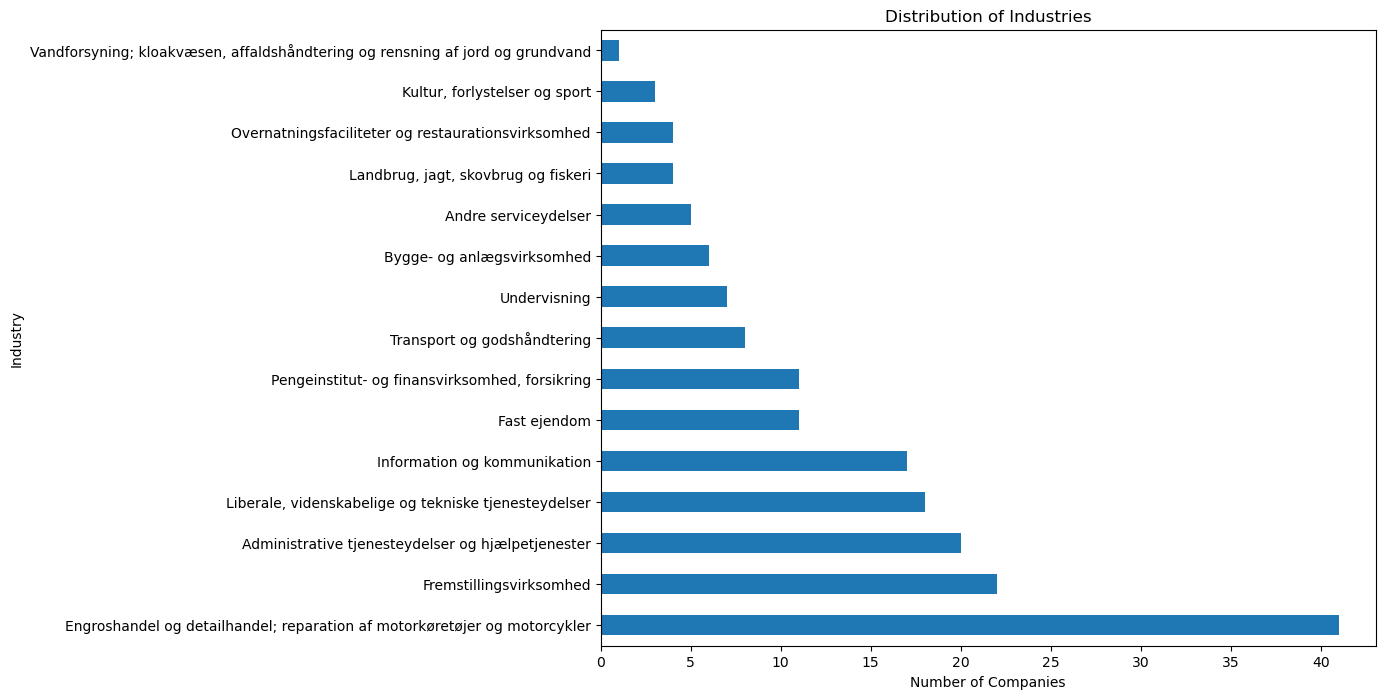

In [11]:
import matplotlib.pyplot as plt

industry_counts = all_years['Industri'].value_counts()
industry_counts.plot(kind='barh', figsize=(10,8))
plt.title('Distribution of Industries')
plt.xlabel('Number of Companies')
plt.ylabel('Industry')
plt.show()


In [12]:
all_years

,CVR,Year,Beløb 12 mdr. (TCV),Løsning,Opsagt dato:,TCV_range,Num_Solutions,Range,CVR + navn,Postnummer,Postdistrikt,Industri,Branchetekst,Eksisterende,No Measure Value
0,28870515,2021,78556.4,"[visma, expense]",2021-01-04 00:00:00,60000-80000,1,60000-80000,28870515 FJORD LINE DANMARK A/S,"9,850",Hirtshals,Transport og godshåndtering,Sø- og kysttransport af passagerer,Ikke kunde,321.0
1,43387014,2021,77346.97,"[visma, løn, og, hr]",2021-01-12 00:00:00,60000-80000,2,60000-80000,43387014 DANSK CAMPING UNION,"2,605",Brøndby,Andre serviceydelser,Andre organisationer og foreninger i.a.n.,NaN,133.0
2,31061350,2021,52126.72,"[bpo, visma, løn, og, hr]",2021-01-13 00:00:00,40000-60000,2,40000-60000,31061350 VOLUBILL DANMARK ApS,"1,553",København V,Information og kommunikation,Computerprogrammering,NaN,2.0
3,61052615,2021,13053.78,"[visma, løn, og, hr]",2021-01-28 00:00:00,0-20000,2,0-20000,61052615 Hovedstadens Ordblindefond,"1,100",København K,Undervisning,Anden undervisning i.a.n.,NaN,1.0
4,26042925,2021,28895.99,"[visma, løn, og, hr]",2021-01-06 00:00:00,20000-40000,2,20000-40000,26042925 Bigtincan A/S,"1,055",København K,Information og kommunikation,Computerprogrammering,NaN,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,34725101,2023,30453.0,"[visma, løn]",2023-05-24 00:00:00,20000-40000,1,20000-40000,34725101 NMP - NETWORK OF MUSIC PARTNERS A/S,"2,300",København S,Administrative tjenesteydelser og hjælpetjenester,Anden forretningsservice i.a.n.,Eksisterende kunde,28.0
204,24246361,2023,104340.0,"[visma, løn, og, ledermedarbejdermodul]",2023-05-24 00:00:00,100000-120000,2,100000-120000,"24246361 HANDELSBANKEN, FILIAL AF SVENSKA HAND...","1,561",København V,"Pengeinstitut- og finansvirksomhed, forsikring","Banker, sparekasser og andelskasser",Eksisterende kunde,1.0
205,20309687,2023,76044.0,"[visma, løn]",2023-05-26 00:00:00,60000-80000,1,60000-80000,20309687 Knowit Experience Aarhus A/S,"8,000",Aarhus C,Information og kommunikation,Computerprogrammering,Eksisterende kunde,55.0
206,34082200,2023,57600.0,"[visma, løn, fehmarn, belt, contractors, is]",2023-05-26 00:00:00,40000-60000,1,40000-60000,34082200 KPMG ACOR TAX PARTNERSELSKAB,"2,900",Hellerup,"Liberale, videnskabelige og tekniske tjenestey...",Bogføring og revision: skatterådgivning,Eksisterende kunde,436.0


In [13]:

# Load the employee data
employee_data = pd.read_excel('stop kunder.xlsx')

# Convert 'CVR' column in employee_data and 'CVR' in all_years to string
employee_data['CVR'] = employee_data['CVR'].astype(str)
all_years['CVR'] = all_years['CVR'].astype(str)

# Merge the dataframes
all_years = pd.merge(all_years, employee_data[['CVR', 'Aktive medarbejdere']], on='CVR', how='left')
all_years.to_excel('ModifiedAllYears.xlsx', index=False)



C:\Users\jean-claude.disch\Anaconda3\lib\site-packages\openpyxl\worksheet\_read_only.py:79: UserWarning: Data Validation extension is not supported and will be removed
  for idx, row in parser.parse():


## Company size (employee count) Histogram

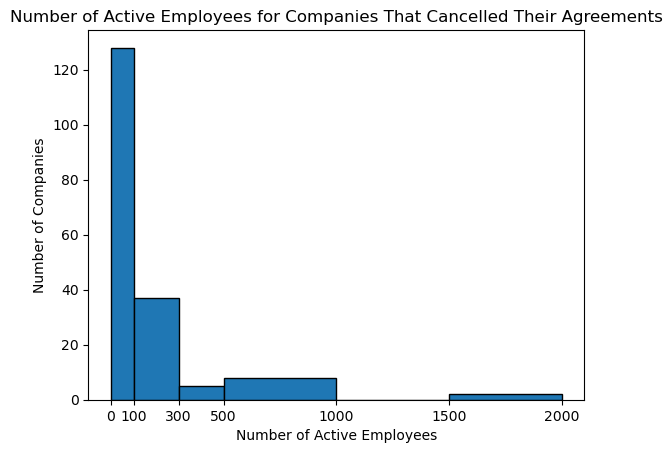

In [15]:
import matplotlib.pyplot as plt

# Ensure 'Aktive medarbejdere' column is numeric
all_years['Aktive medarbejdere'] = pd.to_numeric(all_years['Aktive medarbejdere'], errors='coerce')

# Plot a histogram with modified intervals
plt.hist(all_years['Aktive medarbejdere'].dropna(), bins=[0,100, 300, 500, 1000, 1500, 2000], edgecolor='black')
plt.title('Number of Active Employees for Companies That Cancelled Their Agreements')
plt.xlabel('Number of Active Employees')
plt.ylabel('Number of Companies')
plt.xticks([0, 100, 300, 500, 1000, 1500, 2000])
plt.show()

## Company size (employee count) table
The below table showcases the exact same as the histogram above, but in table form.

In [ ]:
# Create histogram
hist, bin_edges = np.histogram(all_years['Aktive medarbejdere'].dropna(), bins=[0,100, 300, 500, 1000, 1500, 2000])

# Create bin labels
bin_labels = [f'{int(bin_edges[i])}-{int(bin_edges[i+1])}' for i in range(len(bin_edges)-1)]

# Create dataframe
hist_df = pd.DataFrame({'Employee Range': bin_labels, 'Number of Companies': hist})

print(hist_df)


# Avg, max, min
Outliers have been removed to ensure data consitency.

In [ ]:
# Calculate the IQR of the data
Q1 = all_years['Aktive medarbejdere'].quantile(0.20)
Q3 = all_years['Aktive medarbejdere'].quantile(0.99)

# Only keep rows in the data frame where the 'Aktive medarbejdere' value is between Q1 and Q3
filtered_data = all_years[(all_years['Aktive medarbejdere'] >= Q1) & (all_years['Aktive medarbejdere'] <= Q3)]

# Now, calculate the average, highest, and lowest number of employees after removing outliers
average_employees = filtered_data['Aktive medarbejdere'].mean()
highest_employees = filtered_data['Aktive medarbejdere'].max()
lowest_employees = filtered_data['Aktive medarbejdere'].min()

# Create a DataFrame to store the results
summary_table = pd.DataFrame({
    'Statistic': ['Average', 'Highest', 'Lowest'],
    'Number of Employees': [average_employees, highest_employees, lowest_employees]
})

print(summary_table)


# Conclusion

This section will conclude on tendencies which have occurred throughout the analysis.